In [8]:
import pandas as pd
system_comparision = pd.read_csv("system_comparison_metrics.csv")

In [9]:
system_comparision

,test_name,avg_latency_ms,min_latency_ms,max_latency_ms,records,error_rate_percent,recovery_time_sec,uptime_percent
0,local_non_cloud,4121.0,4121.00,4949.00,500,0.0,N/A (local server has no auto-recovery),0%
1,cloud_ec2,147.3,94.93,281.64,150,70.0,Auto (AWS handles restarts),30.0%


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use dark background to match slides
plt.style.use("dark_background")

df = pd.read_csv("system_comparison_metrics.csv")

df


,test_name,avg_latency_ms,min_latency_ms,max_latency_ms,records,error_rate_percent,recovery_time_sec,uptime_percent
0,local_non_cloud,4121.00,4121.00,4949.00,500,0.0,N/A (local server has no auto-recovery),0%
1,cloud_ec2,137.31,108.27,283.84,150,70.0,Auto (AWS handles restarts),30.0%


In [15]:
# Make sure numeric columns are numeric
numeric_cols = [
    "avg_latency_ms", "min_latency_ms", "max_latency_ms",
    "error_rate_percent"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Clean uptime column (it may be stored like "30.0%")
if "uptime_percent" in df.columns:
    df["uptime_percent"] = df["uptime_percent"].astype(str).str.replace("%", "").astype(float)

df


,test_name,avg_latency_ms,min_latency_ms,max_latency_ms,records,error_rate_percent,recovery_time_sec,uptime_percent
0,local_non_cloud,4121.00,4121.00,4949.00,500,0.0,N/A (local server has no auto-recovery),0.0
1,cloud_ec2,137.31,108.27,283.84,150,70.0,Auto (AWS handles restarts),30.0


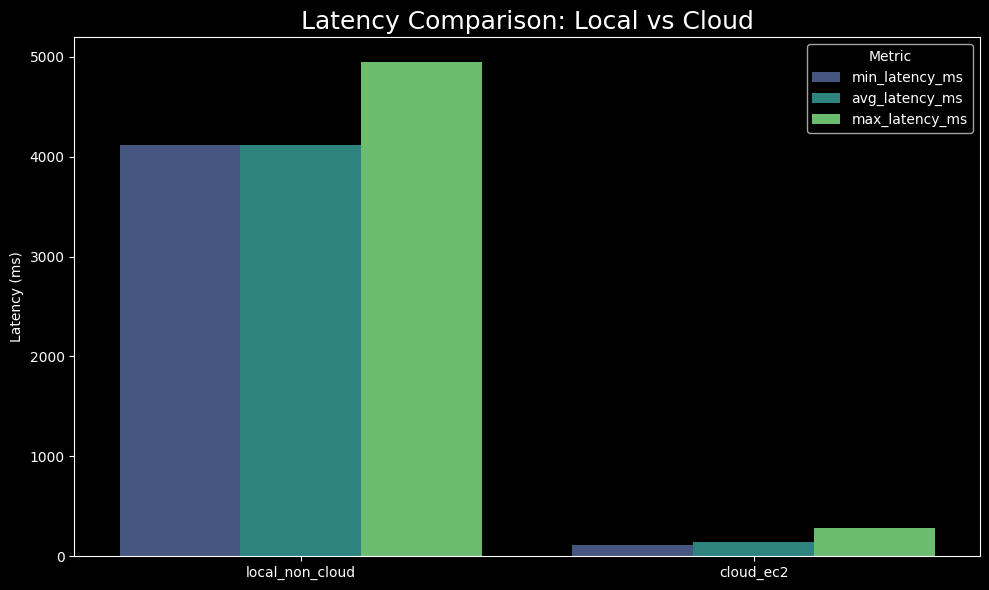

In [16]:
# Pick only the columns we need
lat_df = df[["test_name", "min_latency_ms", "avg_latency_ms", "max_latency_ms"]]

plt.figure(figsize=(10,6))
lat_df_melted = lat_df.melt(id_vars="test_name",
                            var_name="metric",
                            value_name="latency_ms")

sns.barplot(data=lat_df_melted,
            x="test_name",
            y="latency_ms",
            hue="metric",
            palette="viridis")

plt.title("Latency Comparison: Local vs Cloud", fontsize=18)
plt.ylabel("Latency (ms)")
plt.xlabel("")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()


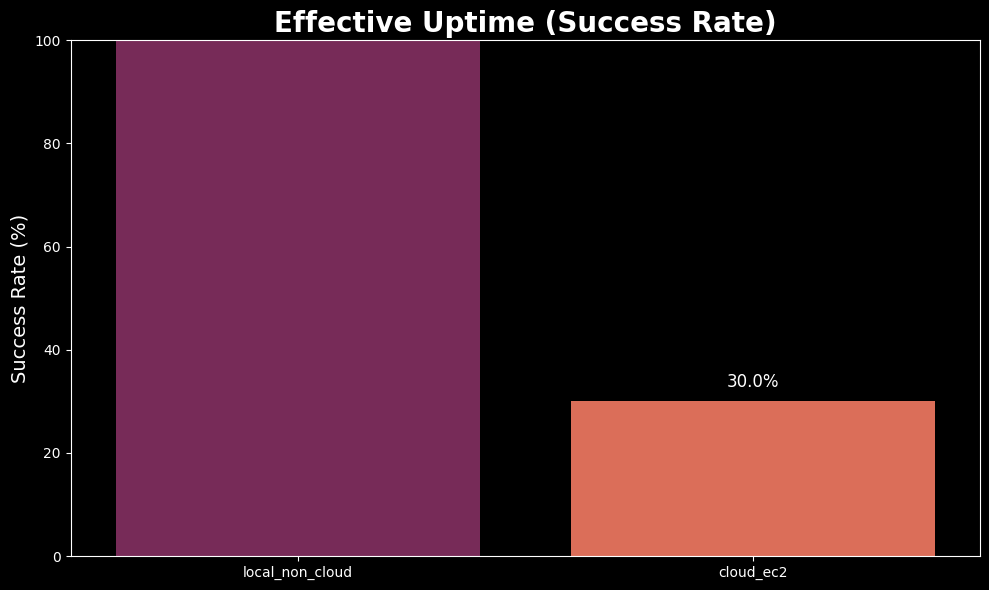

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===== Load Your Real Data =====
df = pd.read_csv("system_comparison_metrics.csv")

# Convert uptime to success-rate = (# successful requests / total requests)
df['success_rate'] = (df['records'] / 500) * 100

# ===== Plot =====
plt.style.use("dark_background")
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=df,
    x="test_name",
    y="success_rate",
    hue="test_name",    # required so palette is not deprecated
    palette="rocket",
    legend=False
)

plt.title("Effective Uptime (Success Rate)", fontsize=20, weight="bold")
plt.ylabel("Success Rate (%)", fontsize=14)
plt.xlabel("")
plt.ylim(0, 100)

# Add value labels on bars
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value:.1f}%", 
        (p.get_x() + p.get_width()/2, value + 2),
        ha='center', va='bottom',
        fontsize=12, color='white'
    )

plt.tight_layout()
plt.show()


/var/folders/0g/0fwyzzl92k12lxxgg0wm14y40000gn/T/ipykernel_7724/4165332429.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,


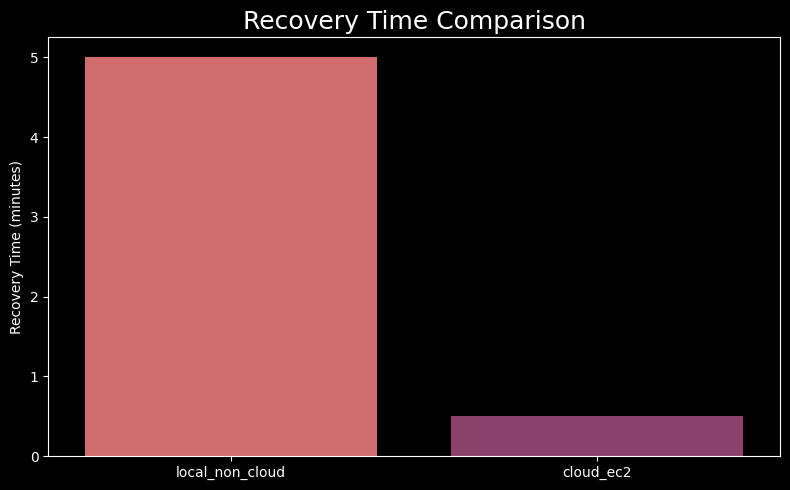

In [18]:
recovery_map = {
    "N/A (local server has no auto-recovery)": 5,
    "5 minutes": 5,
    "Auto (AWS handles restarts)": 0.5
}

df["recovery_numeric_minutes"] = df["recovery_time_sec"].map(recovery_map)

plt.figure(figsize=(8,5))
sns.barplot(data=df,
            x="test_name",
            y="recovery_numeric_minutes",
            palette="flare")

plt.title("Recovery Time Comparison", fontsize=18)
plt.ylabel("Recovery Time (minutes)")
plt.xlabel("")
plt.tight_layout()
plt.show()


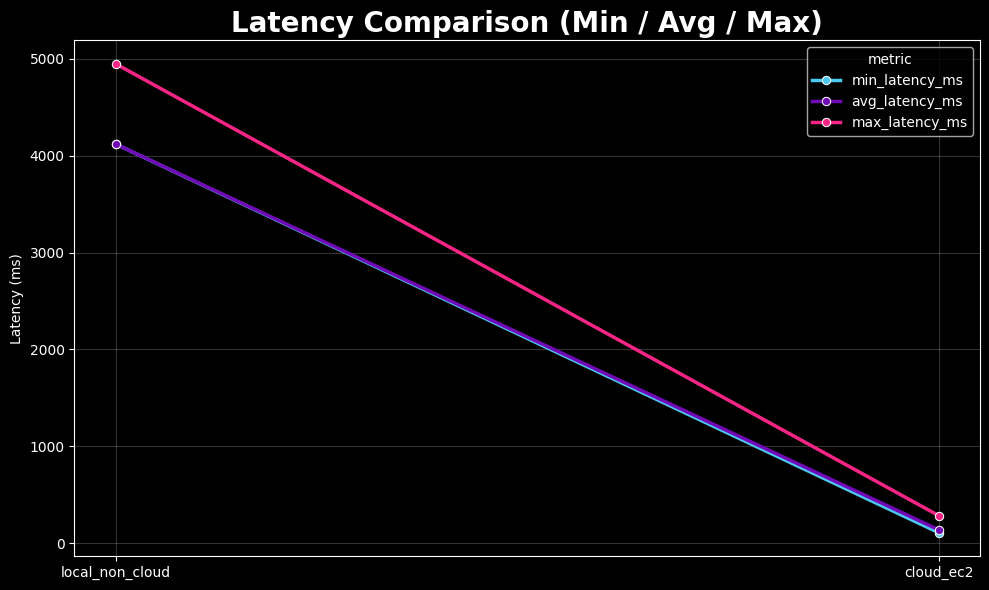

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load your actual data
df = pd.read_csv("system_comparison_metrics.csv")

plt.style.use("dark_background")

# reshape for line plot
line_df = df.melt(
    id_vars=["test_name"],
    value_vars=["min_latency_ms", "avg_latency_ms", "max_latency_ms"],
    var_name="metric",
    value_name="latency"
)

plt.figure(figsize=(10,6))

sns.lineplot(
    data=line_df,
    x="test_name",
    y="latency",
    hue="metric",
    marker="o",
    linewidth=2.5,
    palette=["#4cc9f0", "#7209b7", "#f72585"]
)

plt.title("Latency Comparison (Min / Avg / Max)", fontsize=20, weight="bold")
plt.xlabel("")
plt.ylabel("Latency (ms)")
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()
